Code for figures in section 2.1

In [3]:
import numpy as np
from scipy import linalg
from scipy.stats import semicircular
import seaborn as sns
import math

rng = np.random.default_rng(seed=42)

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [5]:
# Priors on signal
rademacher = lambda n: rng.choice([-1, 1], size=n)
uniform = lambda n: rng.uniform(-1, 1, size=n)
binomial = lambda n: rng.binomial(10, .5, size=n)
test = lambda n: rng.choice([-2, 2], size=n)

In [6]:
def mp_equation(l, c):
    return (l+1-c+np.sqrt((l+1-c)**2-4*l))/2

def mp_estimate(n, c, signal_prior, alpha):
    p = n * c
    u = signal_prior(n)
    A = rng.normal(size=(n, p))
    W = 1/n * (A@A.T)
    X = alpha / n * np.outer(u,u) + W
    D, V = linalg.eigh(X)
    l = D[-1]  # largest eigenvalue
    return mp_equation(l, c)

In [48]:
at4 = [mp_estimate(1000, 4, rademacher, 3) for i in range(1000)]
below4 = [mp_estimate(1000, 4, rademacher, 2) for i in range(1000)]
above4 = [mp_estimate(1000, 4, rademacher, 4) for i in range(1000)]
nan_counts4 = [np.sum(np.isnan(x)) for x in [below4, at4, above4]]

/tmp/ipykernel_825/4268023750.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (l+1-c+np.sqrt((l+1-c)**2-4*l))/2


In [ ]:
at2 = [mp_estimate(1000, 2, rademacher, 1+np.sqrt(2)) for i in range(1000)]
below2 = [mp_estimate(1000, 2, rademacher, np.sqrt(2)) for i in range(1000)]
above2 = [mp_estimate(1000, 2, rademacher, 2+np.sqrt(2)) for i in range(1000)]
nan_counts2 = [np.sum(np.isnan(x)) for x in [below2, at2, above2]]

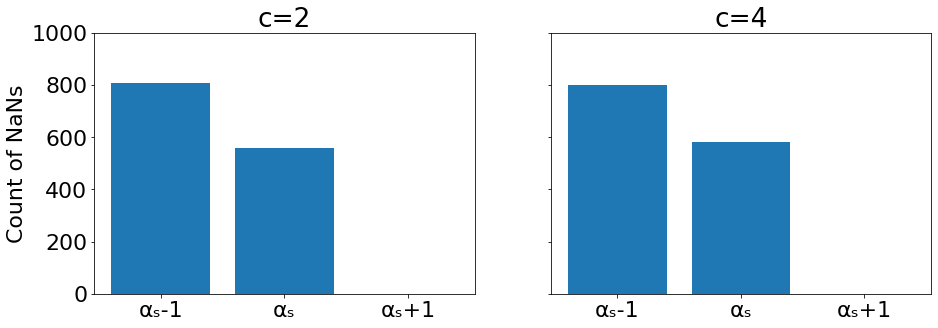

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 4.8))
plt.rcParams.update({'font.size': 22})
axs[0].bar(["αₛ-1", "αₛ", "αₛ+1"], nan_counts2)
axs[0].set_title("c=2")
axs[1].bar(["αₛ-1", "αₛ", "αₛ+1"], nan_counts4)
axs[1].set_title("c=4")
axs[0].set_ylabel("Count of NaNs")
axs[0].set_ylim([0,1000])
plt.savefig("snr_nancount_varying_c", bbox_inches="tight")

In [43]:
get_1000_estimates = lambda n,c: [mp_estimate(n, c, rademacher, 2+np.sqrt(c)) for i in range(1000)]

In [44]:
alpha_accuracy = {n:get_1000_estimates(n,4) for n in [10, 50, 100, 500, 1000, 2000]}

/tmp/ipykernel_825/4268023750.py:2: RuntimeWarning: invalid value encountered in sqrt
  return (l+1-c+np.sqrt((l+1-c)**2-4*l))/2


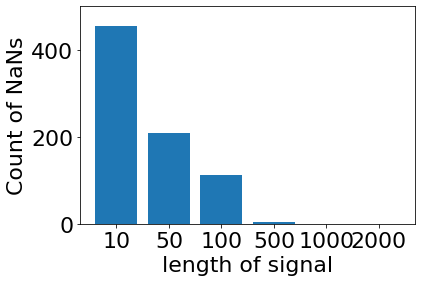

In [84]:
plt.bar([str(x) for x in [10, 50, 100, 500, 1000, 2000]], np.sum([np.isnan(x) for x in alpha_accuracy.values()],axis=1))
plt.ylabel("Count of NaNs")
plt.xlabel("length of signal")
plt.ylim([0,500])
plt.savefig("snr_nancount_varying_n", bbox_inches="tight")

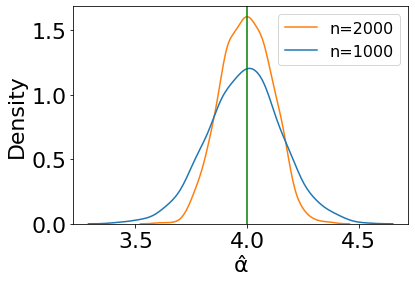

In [124]:
a=sns.kdeplot(data={"n=1000":alpha_accuracy[1000],"n=2000":alpha_accuracy[2000]}, legend=False)
plt.xlabel("α̂")
plt.axvline(4, c="green")
plt.legend(["n=2000","n=1000"],prop={'size': 16})
plt.savefig("snr_dist", bbox_inches="tight")

In [125]:
np.var(alpha_accuracy[2000])

0.012576276656906903

In [126]:
np.var(alpha_accuracy[1000])

0.027421532232829494

In [4]:
def uniform_equation(l, a, b):
    # a: lower bound
    # b: upper bound
    return (b-a) / np.log((l-a)/(l-b))

def uniform_estimate(n, signal_prior, alpha, a=-0.5, b=0.5, detailed=False):
    u = signal_prior(n)
    Lambda = np.diag(rng.uniform(a, b, n))
    G = rng.normal(size=(n,n))
    A = (G+G.T)/np.sqrt(2*n)
    D2, W = linalg.eigh(A)
    X = alpha / n * np.outer(u,u) + W @ Lambda @ W.T
    D, V = linalg.eigh(X)
    l = D[-1]  # largest eigenvalue
    if detailed:
        return uniform_equation(l,a,b), l, u, np.diag(Lambda)
    return uniform_equation(l, a, b)

In [5]:
unif_point2 = [uniform_estimate(1000, rademacher, 0.2, -0.5, 0.5) for i in range(1000)]
unif_point6 = [uniform_estimate(1000, rademacher, 0.6, -0.5, 0.5) for i in range(1000)]
unif_point1 = [uniform_estimate(1000, rademacher, 0.1, -0.5, 0.5) for i in range(1000)]
unif_1 = [uniform_estimate(1000, rademacher, 1, -.5, .5) for i in range(1000)]
unif_nan_counts = [np.sum(np.isnan(x)) for x in [unif_point1, unif_point2, unif_point6, unif_1]]

/tmp/ipykernel_3023/1427006628.py:4: RuntimeWarning: invalid value encountered in log
  return (b-a) / np.log((l-a)/(l-b))


In [6]:
unif2_point2 = [uniform_estimate(1000, rademacher, 0.2, 0, 5) for i in range(1000)]
unif2_point6 = [uniform_estimate(1000, rademacher, 0.6, 0, 5) for i in range(1000)]
unif2_point1 = [uniform_estimate(1000, rademacher, 0.1, 0, 5) for i in range(1000)]
unif2_1 = [uniform_estimate(1000, rademacher, 1, 0, 5) for i in range(1000)]
unif2_nan_counts = [np.sum(np.isnan(x)) for x in [unif2_point1, unif2_point2, unif2_point6, unif2_1]]

/tmp/ipykernel_3023/1427006628.py:4: RuntimeWarning: invalid value encountered in log
  return (b-a) / np.log((l-a)/(l-b))


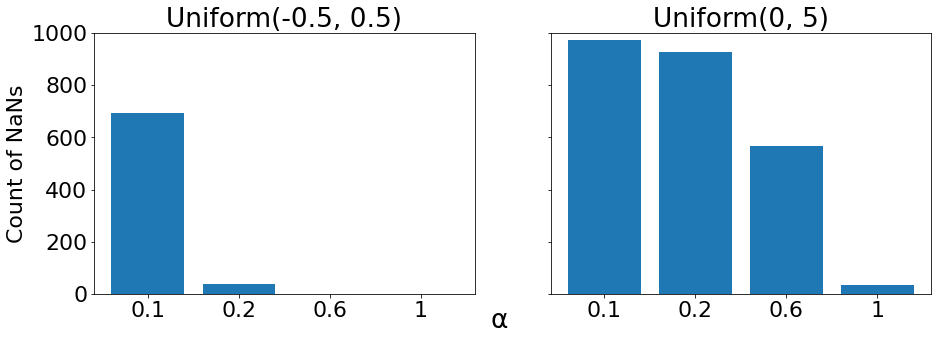

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 4.8))
axs[0].bar(["0.1", "0.2", "0.6", "1"], unif_nan_counts)
axs[0].set_title("Uniform(-0.5, 0.5)")
axs[1].bar(["0.1", "0.2", "0.6", "1"], unif2_nan_counts)
axs[1].set_title("Uniform(0, 5)")
axs[0].set_ylabel("Count of NaNs")
axs[0].set_ylim([0,1000])
fig.supxlabel("α")
plt.savefig("snr_uniform_nancount", bbox_inches="tight")

In [6]:
unif_point1_detailed = [uniform_estimate(1000, rademacher, 0.1, -0.5, 0.5, detailed=True) for i in range(1000)]

/tmp/ipykernel_3443/3533538112.py:4: RuntimeWarning: invalid value encountered in log
  return (b-a) / np.log((l-a)/(l-b))


In [7]:
isnan = lambda x: np.isnan(x[0])==True

In [8]:
unif_point1_nans = [x for x in unif_point1_detailed if isnan(x)]
unif_point1_notnans = [x for x in unif_point1_detailed if not isnan(x)]

In [19]:
len(unif_point1_notnans)

314

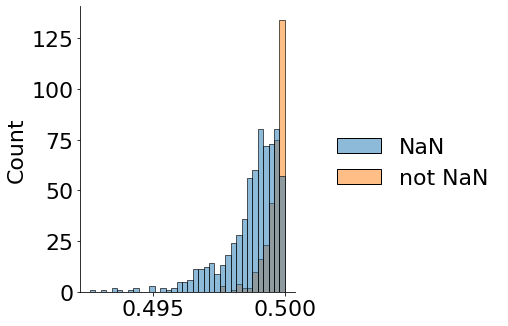

In [17]:
sns.displot(data={"NaN":[max(x[3]) for x in unif_point1_nans],"not NaN":[max(x[3]) for x in unif_point1_notnans]})
plt.savefig("snr_uniform_point1_maxeigenvalue", bbox_inches="tight")

In [11]:
unif3_point2 = [uniform_estimate(1000, rademacher, 0.2, -1, 1) for i in range(1000)]
unif3_point6 = [uniform_estimate(1000, rademacher, 0.6, -1, 1) for i in range(1000)]
unif3_point1 = [uniform_estimate(1000, rademacher, 0.1, -1, 1) for i in range(1000)]
unif3_1 = [uniform_estimate(1000, rademacher, 1, -1, 1) for i in range(1000)]
unif3_nan_counts = [np.sum(np.isnan(x)) for x in [unif3_point1, unif3_point2, unif3_point6, unif3_1]]

/tmp/ipykernel_292/3533538112.py:4: RuntimeWarning: invalid value encountered in log
  return (b-a) / np.log((l-a)/(l-b))


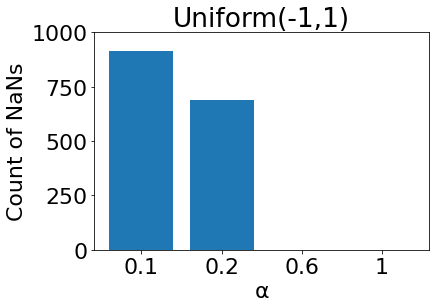

In [12]:
plt.bar(["0.1", "0.2", "0.6", "1"], unif3_nan_counts)
plt.ylabel("Count of NaNs")
plt.ylim([0,1000])
plt.xlabel("α")
plt.title(label="Uniform(-1,1)")
plt.savefig("snr_uniform_nancount5", bbox_inches="tight")

In [13]:
unif4_point2 = [uniform_estimate(1000, rademacher, 0.2, -.25, .75) for i in range(1000)]
unif4_point6 = [uniform_estimate(1000, rademacher, 0.6, -.25, .75) for i in range(1000)]
unif4_point1 = [uniform_estimate(1000, rademacher, 0.1, -.25, .75) for i in range(1000)]
unif4_1 = [uniform_estimate(1000, rademacher, 1, -.25, .75) for i in range(1000)]
unif4_nan_counts = [np.sum(np.isnan(x)) for x in [unif4_point1, unif4_point2, unif4_point6, unif4_1]]

/tmp/ipykernel_292/3533538112.py:4: RuntimeWarning: invalid value encountered in log
  return (b-a) / np.log((l-a)/(l-b))


Text(0.5, 1.0, 'Uniform(-0.25,0.75)')

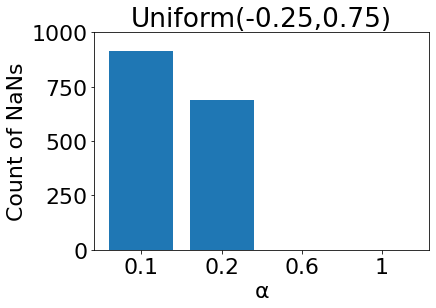

In [14]:
plt.bar(["0.1", "0.2", "0.6", "1"], unif3_nan_counts)
plt.ylabel("Count of NaNs")
plt.ylim([0,1000])
plt.xlabel("α")
plt.title(label="Uniform(-0.25,0.75)")
#plt.savefig("snr_uniform_nancount6", bbox_inches="tight")

## New Noise

If I'm understanding correctly, by applying QR decomposition to gaussian matrices, I should get uniformly orthogonal matrices

In [71]:
def get_fancy_noise(n):
    # rotationally invariant noise (n x n) with largest eigval = 1
    m_normal = rng.normal(size=(n,n))
    q, r = np.linalg.qr(m_normal)
    eigvals = rng.beta(2, 2, size=n)
    q = rng.permutation(q.T).T
    noise = q@np.diag(eigvals)@q.T
    return noise

def fancy_equation(l):
    return 1/(6/4 * (-l**2*math.log(l) + l*math.log(l) + math.log(l-1)*l**2 - math.log(l-1)*l + l - 1/2))

def fancy_estimate(n, signal_prior, alpha):
    u = signal_prior(n)
    W = get_fancy_noise(n)
    X = alpha / n * np.outer(u,u) + W
    D, V = linalg.eigh(X)
    l = D[-1]  # largest eigenvalue
    return fancy_equation(l)

In [70]:
fancy_estimate(100, rademacher, 2)

7.768614361250533

# New Noise

Via integration by parts,
\begin{align*}
u(x) &= \frac{1}{z-x} \\
v'(x) &= \text{Density} \\
\int^b_a u(x)v'(x) dx &= u(b)v(b)-u(a)v(a)-\int^b_a u'(x)v(x)dx
\end{align*}

Since $v(x)$ is the CDF, we know that $v(b)=1,v(a)=0$, giving us
$$G(z)=\frac{1}{z-b}-\int_a^b \frac{1}{(z-x)^2}v(x)dx$$

For $\Lambda\sim\text{Beta}(2,2)$, we have
\begin{align*}
G(z) &= \frac{1}{z-1} - \int^1_0\frac{1}{(z-x)^2}\frac{\int_0^x t(1-t)dt}{\int_0^1 t(1-t)dt} \\
&= \frac{1}{z-1}-\frac{-6z^2+9z+6z(z-1)^2\log (\frac{-z}{1-z})-2}{z-1}
\end{align*}

In [220]:
def get_beta_noise(n):
    # rotationally invariant noise (n x n) with largest eigval = 1
    m_normal = rng.normal(size=(n,n))
    q, r = np.linalg.qr(m_normal)
    eigvals = rng.beta(2, 2, size=n)
    q = rng.permutation(q.T).T
    noise = q@np.diag(eigvals)@q.T
    return noise

def beta_equation(z):
    # This is the inverse of the Cauchy transform
    return (z-1) / (1+6*z**2-9*z-6*z*(z-1)**2*np.log(-z/(1-z))+2)

def beta_estimate(n, signal_prior, alpha, detailed=False):
    u = signal_prior(n)
    u = u*(np.sqrt(n)/np.linalg.norm(u))
    W = get_beta_noise(n)
    X = alpha / n * np.outer(u,u) + W
    D, V = linalg.eigh(X)
    l = D[-1]  # largest eigenvalue
    if detailed:
        return beta_equation(l), l
    return beta_equation(l)

In [31]:
beta_quarter = [beta_estimate(1000, rademacher, 0.25) for i in range(1000)]
beta_third = [beta_estimate(1000, rademacher, 1/3) for i in range(1000)]
beta_half = [beta_estimate(1000, rademacher, 0.5) for i in range(1000)]
beta_one = [beta_estimate(1000, rademacher, 1) for i in range(1000)]
beta_nan_counts = [np.sum(np.isnan(x)) for x in [beta_quarter, beta_third, beta_half, beta_one]]

/tmp/ipykernel_237/3931927414.py:12: RuntimeWarning: invalid value encountered in log
  return (z-1) / (1+6*z**2-9*z-6*z*(z-1)**2*np.log(-z/(1-z))+2)


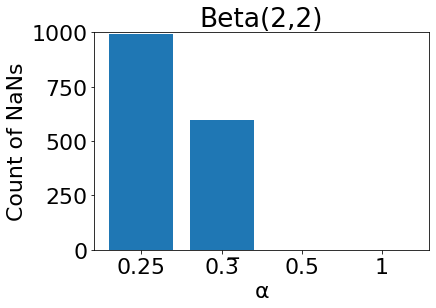

In [44]:
plt.bar(["0.25", "0.3̅", "0.5", "1"], beta_nan_counts)
plt.ylabel("Count of NaNs")
plt.ylim([0,1000])
plt.xlabel("α")
plt.title(label="Beta(2,2)")
plt.savefig("snr_beta_nancount", bbox_inches="tight")

In [46]:
beta_get_1000_estimates = lambda n: [beta_estimate(n, rademacher, 1) for i in range(1000)]
beta_accuracy = {n:beta_get_1000_estimates(n) for n in [10, 50, 100, 500, 1000, 2000]}

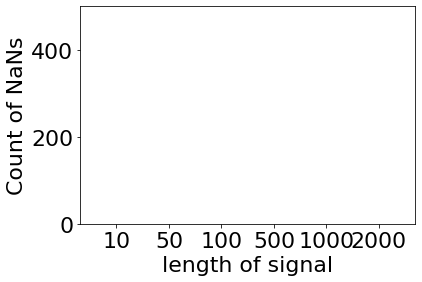

In [47]:
plt.bar([str(x) for x in [10, 50, 100, 500, 1000, 2000]], np.sum([np.isnan(x) for x in beta_accuracy.values()],axis=1))
plt.ylabel("Count of NaNs")
plt.xlabel("length of signal")
plt.ylim([0,500])
plt.savefig("snr_beta_nancount_varying_n", bbox_inches="tight")

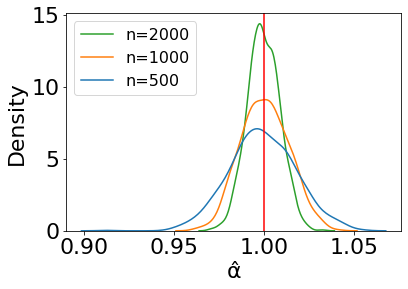

In [54]:
a=sns.kdeplot(data={"n=500":beta_accuracy[500], "n=1000":beta_accuracy[1000],"n=2000":beta_accuracy[2000]}, legend=False)
plt.xlabel("α̂")
plt.axvline(1, c="red")
plt.legend(["n=2000","n=1000", "n=500"],prop={'size': 16})
plt.savefig("snr_beta_dist", bbox_inches="tight")

In [213]:
beta2_quarter = [beta_estimate(1000, uniform, 0.25) for i in range(1000)]
beta2_third = [beta_estimate(1000, uniform, 1 / 3) for i in range(1000)]
beta2_half = [beta_estimate(1000, uniform, 0.5) for i in range(1000)]
beta2_one = [beta_estimate(1000, uniform, 1) for i in range(1000)]
beta2_nan_counts = [np.sum(np.isnan(x)) for x in [beta2_quarter, beta2_third, beta2_half, beta2_one]]

/tmp/ipykernel_237/3931927414.py:12: RuntimeWarning: invalid value encountered in log
  return (z-1) / (1+6*z**2-9*z-6*z*(z-1)**2*np.log(-z/(1-z))+2)


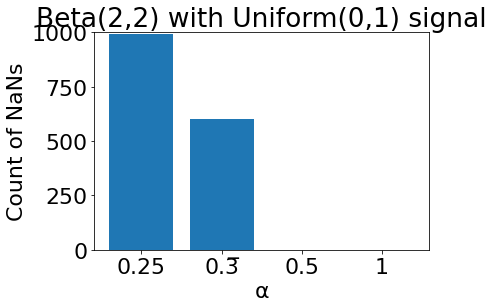

In [214]:
plt.bar(["0.25", "0.3̅", "0.5", "1"], beta2_nan_counts)
plt.ylabel("Count of NaNs")
plt.ylim([0, 1000])
plt.xlabel("α")
plt.title(label="Beta(2,2) with Uniform(0,1) signal")
plt.savefig("snr_beta_nancount_uniform_signal", bbox_inches="tight")

In [221]:
beta2_get_1000_estimates = lambda n: [beta_estimate(n, uniform, 1) for i in range(1000)]
beta2_accuracy = {n: beta2_get_1000_estimates(n) for n in [10, 50, 100, 500, 1000, 2000]}

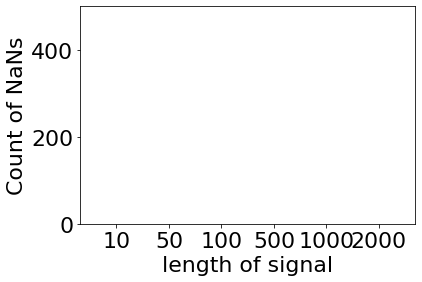

In [222]:
plt.bar([str(x) for x in [10, 50, 100, 500, 1000, 2000]], np.sum([np.isnan(x) for x in beta2_accuracy.values()], axis=1))
plt.ylabel("Count of NaNs")
plt.xlabel("length of signal")
plt.ylim([0, 500])
plt.savefig("snr_beta_nancount_varying_n_uniform_signal", bbox_inches="tight")

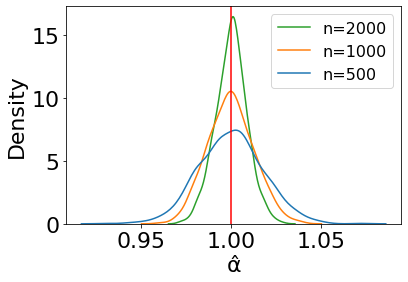

In [223]:
a = sns.kdeplot(data={"n=500": beta2_accuracy[500], "n=1000": beta2_accuracy[1000], "n=2000": beta2_accuracy[2000]},
                legend=False)
plt.xlabel("α̂")
plt.axvline(1, c="red")
plt.legend(["n=2000", "n=1000", "n=500"], prop={'size': 16})
plt.savefig("snr_beta_dist_uniform_signal", bbox_inches="tight")

In [1]:
def get_wigner_noise(n):
    # rotationally invariant noise (n x n) with largest eigval = 1
    m_normal = rng.normal(size=(n,n))
    q, r = np.linalg.qr(m_normal)
    eigvals = semicircular.rvs(size=n, random_state=rng)
    q = rng.permutation(q.T).T
    noise = q@np.diag(eigvals)@q.T
    return noise

def wigner_equation(z):
    # This is the inverse of the Cauchy transform
    return 1/(-2*(np.sqrt(z**2-1)-z))

def wigner_estimate(n, signal_prior, alpha, detailed=False):
    u = signal_prior(n)
    u = u*(np.sqrt(n)/np.linalg.norm(u))
    W = get_wigner_noise(n)
    X = alpha / n * np.outer(u,u) + W
    D, V = linalg.eigh(X)
    l = D[-1]  # largest eigenvalue
    if detailed:
        return wigner_equation(l), l
    return wigner_equation(l)

In [26]:
wigner_estimate(100, binomial, 1)

1.0121863636004533